# Pendulum

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "seaborn"

## Frictionless pendulum

Let $x \in \mathbb R$ a variable denoting the angle of the pendulum compared to the downward position.
The usual equation for the non-dimensional pendulum is given by:

$$
\ddot x = - \sin(x).
$$

Let's set $q = x$ and $p = \dot x$, the previous equation can be recast into a system of first order ordinary differential equations :

$$
\left\{ 
\begin{aligned} 
\dot q & = p\\ 
\dot p & = -\sin(q)
\end{aligned} 
\right. 
$$

In [2]:
class frictionless_pendulum_model:

    def __init__(self):
        pass

    def fcn(self, t, y):
        q, p = y
        q_dot = p
        p_dot = -np.sin(q)
        return (q_dot, p_dot)

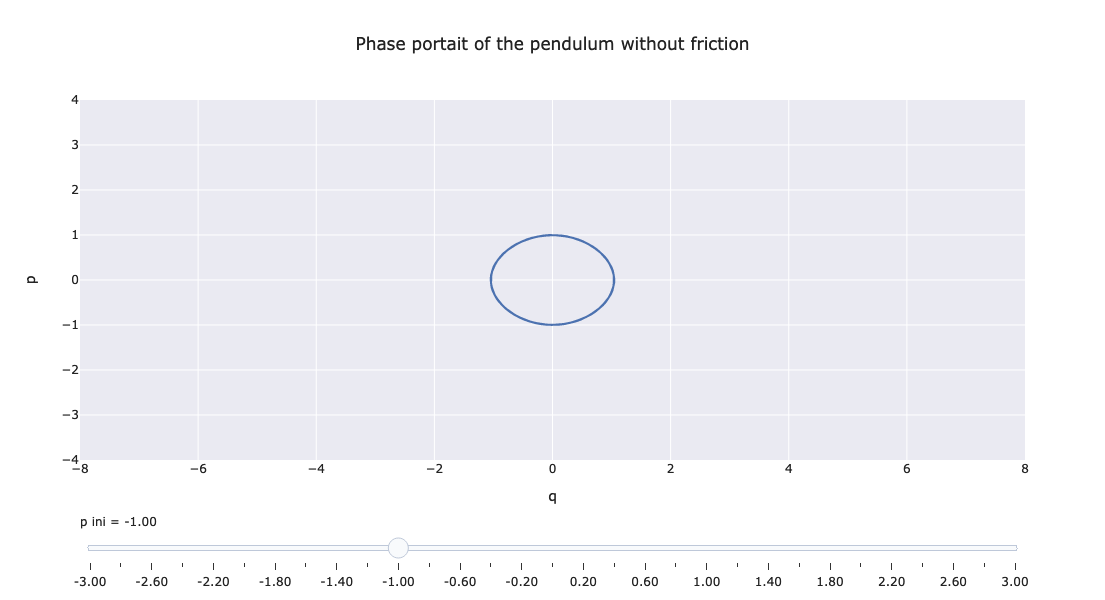

In [23]:
flpm = frictionless_pendulum_model()
fcn = flpm.fcn

tini = 0.0
tend = 20.0

q_ini = 0.
p_ini = np.arange(-3,3.1,0.2)
i_beg = (np.argwhere(np.abs(p_ini + 1) < 1e-10)).flatten()[0]

sol = solve_ivp(fcn, (tini, tend), (q_ini, p_ini[i_beg]), t_eval=np.linspace(tini, tend, 200))

fig = go.Figure()
fig.add_trace(go.Scatter(x=sol.y[0], y=sol.y[1]))

#create slider
steps = []
for p_ini_i in p_ini:
    sol = solve_ivp(fcn, (tini, tend), (q_ini, p_ini_i), t_eval=np.linspace(tini, tend, 200))
    step = dict(method="update", label = f"{p_ini_i:.2f}", args=[{"x": [sol.y[0]], "y": [sol.y[1]]}])
    steps.append(step)
sliders = [dict(active=i_beg, currentvalue={'prefix': 'p ini = '}, steps=steps)]

fig.update_layout(sliders=sliders, title = 'Phase portait of the pendulum without friction', height=600)
fig.update_xaxes(title='q', range=[-8, 8])
fig.update_yaxes(title='p', range=[-4, 4])
fig['layout']['sliders'][0]['pad']=dict(t=50)
fig.show()

## Friction pendulum

By adding friction, the previous system can be written :

$$
\left\{ 
\begin{aligned} 
\dot q & = p\\ 
\dot p & = -\sin(q) - \alpha \, p
\end{aligned} 
\right. 
$$

In [18]:
class friction_pendulum_model:

    def __init__(self, alpha):
        self.alpha = alpha

    def fcn(self, t, y):
        alpha = self.alpha
        q, p = y
        q_dot = p
        p_dot = -np.sin(q) -alpha*p
        return (q_dot, p_dot)

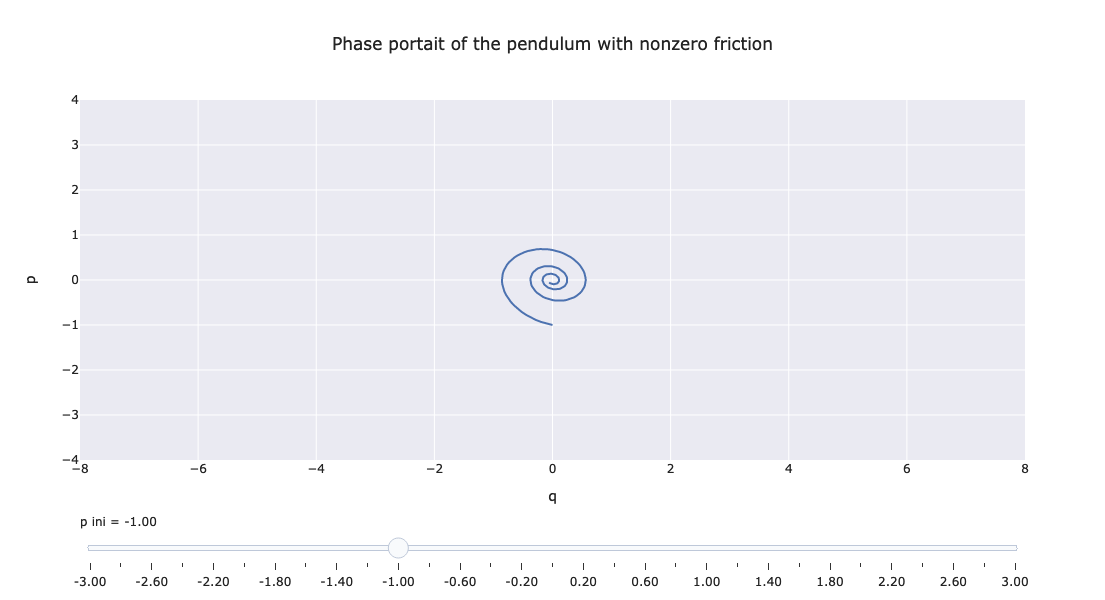

In [21]:
fpm = friction_pendulum_model(alpha=0.25)
fcn = fpm.fcn

tini = 0.0
tend = 20.0

q_ini = 0.
p_ini = np.arange(-3,3.1,0.2)
i_beg = (np.argwhere(np.abs(p_ini + 1) < 1e-10)).flatten()[0]

sol = solve_ivp(fcn, (tini, tend), (q_ini, p_ini[i_beg]), t_eval=np.linspace(tini, tend, 200))

fig = go.Figure()
fig.add_trace(go.Scatter(x=sol.y[0], y=sol.y[1]))

#create slider
steps = []
for p_ini_i in p_ini:
    sol = solve_ivp(fcn, (tini, tend), (q_ini, p_ini_i), t_eval=np.linspace(tini, tend, 200))
    step = dict(method="update", label = f"{p_ini_i:.2f}", args=[{"x": [sol.y[0]], "y": [sol.y[1]]}])
    steps.append(step)
sliders = [dict(active=i_beg, currentvalue={'prefix': 'p ini = '}, steps=steps)]

fig.update_layout(sliders=sliders, title = 'Phase portait of the pendulum with nonzero friction', height=600)
fig.update_xaxes(title='q',range=[-8, 8])
fig.update_yaxes(title='p',range=[-4, 4])
fig['layout']['sliders'][0]['pad']=dict(t=50)
fig.show()